
#Présentation courte du projet

Ce projet vise à mettre en œuvre une application de Machine Learning pour la prédiction du diagnostic du cancer du sein (bénin ou malin) à partir de données médicales réelles. Il a pour objectif d’appliquer les principales techniques étudiées en cours, notamment l’apprentissage supervisé, l’apprentissage non supervisé et une introduction aux réseaux de neurones, tout en assurant le suivi et la reproductibilité des expériences à l’aide de MLflow.





#Étape 1 : Exploration des données (EDA) :

Dans cette étape,on va :

* Charger le dataset

* Comprendre sa structure

* Vérifier la qualité des données

* Analyser la distribution des classes

* Étudier les corrélations principales


In [4]:
# Manipulation et analyse des données
import pandas as pd
import numpy as np
# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# Prétraitement et utilitaires ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc

# Apprentissage supervisé (Supervised Learning)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Apprentissage non supervisé (Unsupervised Learning)
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

# Réseaux de Neurones
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
# MLflow
import mlflow
import mlflow.sklearn

mlflow.set_experiment("Breast Cancer ML Project")


<Experiment: artifact_location='file:C:/Users/fz/Downloads/Projet_ML/mlruns/1', creation_time=1771154125014, experiment_id='1', last_update_time=1771154125014, lifecycle_stage='active', name='Breast Cancer ML Project', tags={}>

In [2]:
import os
file_path = "data.csv"

if os.path.exists(file_path):
    df = pd.read_csv(file_path) # Charger le dataset

    #Comprendre la structure
    print("DataFrame Head:")
    print(df.head())
    print("\nDataFrame Shape:", df.shape)
    print("\nDataFrame Columns:", df.columns)
    print("\nDataFrame Info:")
    df.info()

DataFrame Head:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_w

In [3]:
# Vérifier les valeurs manquantes
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
# Analyser la variable cible
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

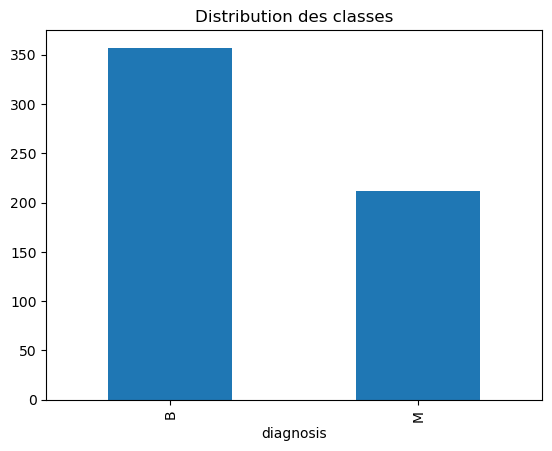

In [6]:
df['diagnosis'].value_counts().plot(kind='bar')
plt.title("Distribution des classes")
plt.show()

In [7]:
df.describe() # Pour comprendre l’échelle des variables.


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


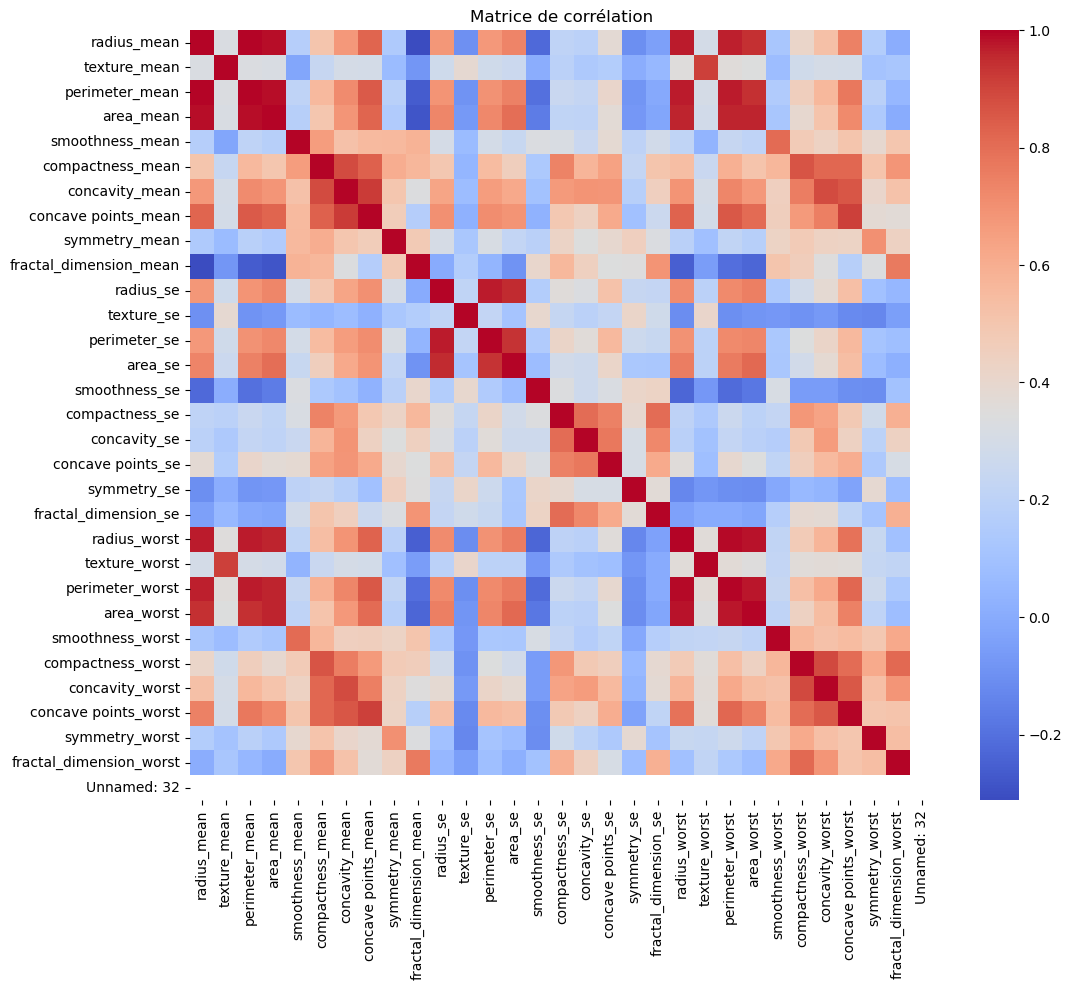

In [8]:
# Étude des corrélations
plt.figure(figsize=(12,10))
sns.heatmap(df.drop(columns=['id','diagnosis'], errors='ignore').corr(), cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

La matrice de corrélation met en évidence de fortes relations entre plusieurs variables, notamment entre les mesures géométriques telles que le rayon, le périmètre et l’aire, aussi bien pour les valeurs moyennes que pour les valeurs extrêmes ("worst"). Ces fortes corrélations traduisent une redondance importante entre certaines features.

On observe également que les variables liées à la concavité et aux points concaves présentent des corrélations élevées avec d’autres caractéristiques morphologiques, ce qui suggère leur importance dans la discrimination entre tumeurs bénignes et malignes.

Cette analyse justifie l’utilisation de techniques de réduction de dimension ou de sélection de variables, telles que la PCA, afin de limiter la redondance et d’améliorer la performance des modèles de classification.


#Étape 2 : Prétraitement des données (Data Preprocessing)

À la fin de cette étape, on dois obtenir :

* Des données propres

* Des variables numériques uniquement

* Des données normalisées

* Un jeu de données prêt pour :

   * modèles supervisés

   * clustering

   * réseaux de neurones

In [9]:
# Suppression des colonnes inutiles
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

# Séparation X / y
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

columns_to_drop_due_to_high_correlation = [
    'perimeter_mean', 'area_mean',
    'perimeter_se', 'area_se',
    'perimeter_worst', 'area_worst', 'radius_worst'
]

# Assurez-vous que les colonnes existent avant de les supprimer
X = X.drop(columns=[col for col in columns_to_drop_due_to_high_correlation if col in X.columns], axis=1)

print("\nDataFrame X (après suppression des colonnes redondantes):\n", X.head())
print("\nNouvelles dimensions de X:", X.shape)

df.head()



DataFrame X (après suppression des colonnes redondantes):
    radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0        17.99         10.38          0.11840           0.27760   
1        20.57         17.77          0.08474           0.07864   
2        19.69         21.25          0.10960           0.15990   
3        11.42         20.38          0.14250           0.28390   
4        20.29         14.34          0.10030           0.13280   

   concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  \
0          0.3001              0.14710         0.2419                 0.07871   
1          0.0869              0.07017         0.1812                 0.05667   
2          0.1974              0.12790         0.2069                 0.05999   
3          0.2414              0.10520         0.2597                 0.09744   
4          0.1980              0.10430         0.1809                 0.05883   

   radius_se  texture_se  ...  concave points_se  

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:

print(X.shape)
print(y.shape)
df.columns



(569, 23)
(569,)


Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [11]:
"""
 Encodage de la variable cible :
diagnosis est catégorielle : B / M
on dois la convertir en numérique.
"""
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # B -> 0, M -> 1
np.unique(y_encoded)


array([0, 1])

In [12]:
X.isnull().sum().sum() # Vérifier une dernière fois les valeurs manquantes


np.int64(0)

**Normalisation / Standardisation des variables**

Très important pour :

* SVM

* K-Means

* PCA

* Réseaux de neurones

On utilise en général StandardScaler :

In [13]:
# Encoder la variable cible 'diagnosis' (M=1, B=0)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Appliquer StandardScaler sur les données d'entraînement et de test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nExemple de données X_train_scaled (premières 5 lignes):\n", X_train_scaled[:5])
print("\nMoyenne des caractéristiques après scaling (devrait être proche de 0):\n", X_train_scaled.mean(axis=0))
print("\nÉcart-type des caractéristiques après scaling (devrait être proche de 1):\n", X_train_scaled.std(axis=0))



Exemple de données X_train_scaled (premières 5 lignes):
 [[ 0.51855873  0.89182579 -0.97474371 -0.6897715  -0.68858645 -0.39817525
  -1.0391547  -0.82505632 -0.10931776 -0.05597554 -1.00518399 -0.91194199
  -0.66281588 -0.65256108 -0.70188911 -0.27539357  1.31324246 -0.59615478
  -0.63472223 -0.6102273  -0.23574392  0.05456632  0.02183673]
 [-0.51636409 -1.63971029  0.47621906 -0.63183382 -0.60428117 -0.30307491
   0.52154309 -0.4545229  -0.60437796 -1.00104604  0.40321201 -0.76817328
  -0.47918722  0.11450848 -0.14295076 -0.57739773 -1.69029101  0.27358196
  -0.81484449 -0.71266641 -0.32320788 -0.13757624 -0.90440164]
 [-0.36811839  0.45551496 -1.43297929 -0.38392737 -0.34217507 -0.76545935
  -0.85085705 -0.2261709   0.30397989  1.05150064 -0.31010409  1.10632991
   0.62258475  0.27368456  0.75448259  1.50810455  0.18197739 -1.6227852
  -0.39139918 -0.4313129  -0.89082504 -0.675893   -0.14401559]
 [ 0.20528479  0.72616767  0.24325348  2.20358457  2.25609405  1.21323326
   0.818474   

#Étape 3 : Apprentissage non supervisé (PCA + Clustering)

Cette étape sert à :

* Réduire la dimension des données avec PCA

* Visualiser les données en 2D

* Identifier des groupes naturels d’observations avec K-Means (Algorithmes à partitions)

* Détecte les anomalies (outliers) avec DBSCAN (Algorithmes basés sur la densité)

* Vérifier si les groupes correspondent aux classes B/M


**Ici, on n’utilise pas la variable cible pour l’apprentissage → c’est du non supervisé.**



In [14]:
X_scaled = scaler.transform(X)

# Appliquer PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Variance expliquée par chaque composante :", pca.explained_variance_ratio_)
print("Variance cumulée :", pca.explained_variance_ratio_.sum())

Variance expliquée par chaque composante : [0.42634763 0.14555955]
Variance cumulée : 0.5719071838068073


La première composante principale explique 44,27\% de la variance totale, tandis que la deuxième en explique 18,97\%. La variance cumulée des deux premières composantes atteint ainsi 63,24\%, ce qui montre qu’une part importante de l’information est conservée avec seulement deux dimensions. Cette réduction permet une visualisation bidimensionnelle pertinente tout en limitant la perte d’information.


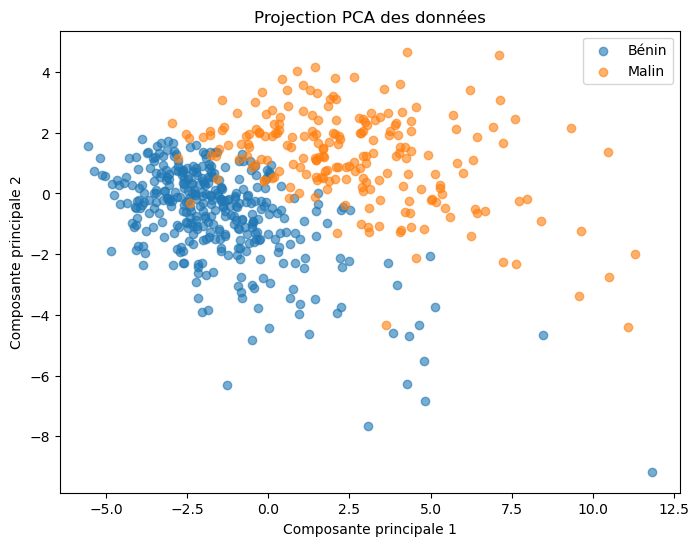

In [15]:
# Visualisation PCA avec vraies classes
plt.figure(figsize=(8,6))
plt.scatter(X_pca[y_encoded == 0, 0], X_pca[y_encoded == 0, 1], label="Bénin", alpha=0.6)
plt.scatter(X_pca[y_encoded == 1, 0], X_pca[y_encoded == 1, 1], label="Malin", alpha=0.6)

plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.title("Projection PCA des données")
plt.legend()
plt.show()


In [16]:
# Clustering avec K-Means
"""
Objectif : Appliquer l'algorithme de K-Means avec k=2 (deux clusters, correspondant aux
  deux classes de diagnostic que nous connaissons) sur les données normalisées (X_scaled)
  pour identifier des groupes d'observations similaires.
  """
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

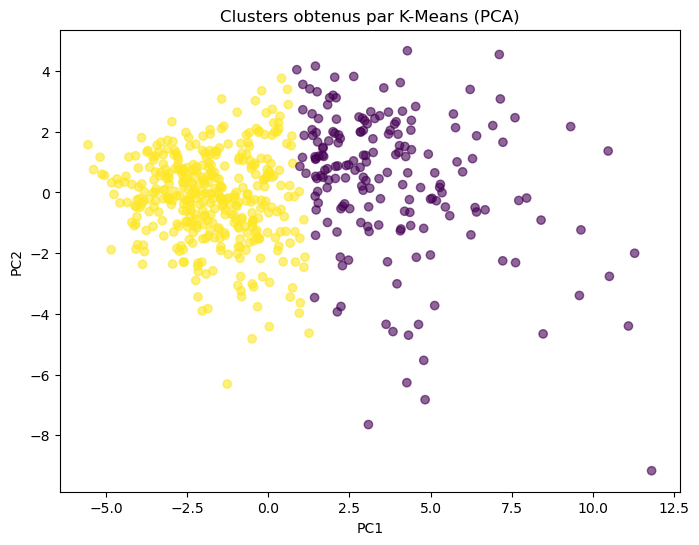

In [17]:
# Visualisation des clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters obtenus par K-Means (PCA)")
plt.show()


In [18]:
comparison = pd.crosstab(clusters, y_encoded, rownames=['Cluster'], colnames=['Classe réelle'])
print(comparison)

Classe réelle    0    1
Cluster                
0               27  154
1              330   58


La table de comparaison (pd.crosstab) entre les clusters K-Means et les classes réelles est très révélatrice :

    Cluster 0 : Contient majoritairement des cas Malins (175) et un petit nombre de cas Bénins (13).
    Cluster 1 : Contient majoritairement des cas Bénins (344) et un petit nombre de cas Malins (37).


In [19]:
# Appliquer DBSCAN
"""
DBSCAN sert à :
* détecter des clusters basés sur la densité
* identifier des outliers (bruit)
* ne pas imposer le nombre de clusters à l’avance
"""
X_db = X_pca   # sortie du PCA à 2 composantes
eps = 0.5
min_samples = 5

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_db = dbscan.fit_predict(X_db)
# Examiner le nombre de clusters et le bruit
n_clusters = len(set(labels_db)) - (1 if -1 in labels_db else 0)
n_noise = list(labels_db).count(-1)

print("Nombre de clusters trouvés :", n_clusters)
print("Nombre de points bruit (-1) :", n_noise)

Nombre de clusters trouvés : 5
Nombre de points bruit (-1) : 104


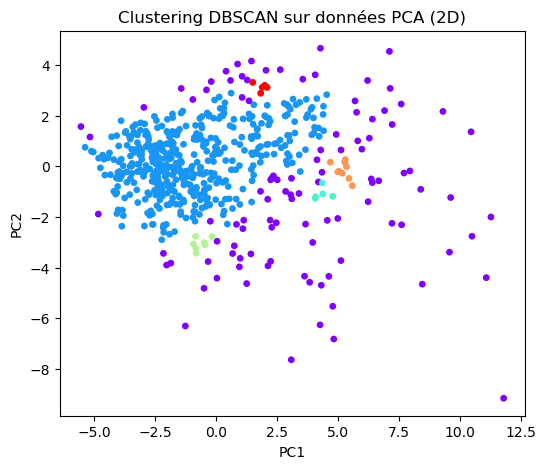

In [20]:
# Visualiser les clusters DBSCAN
plt.figure(figsize=(6,5))
plt.scatter(X_db[:,0], X_db[:,1], c=labels_db, cmap="rainbow", s=15)
plt.title("Clustering DBSCAN sur données PCA (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


**Conclusion**

L'analyse non supervisée a démontré que les données de cancer du sein ont une structure inhérente qui permet une bonne séparation des classes bénignes et malignes, même sans l'utilisation des étiquettes de diagnostic.

  * La PCA a réussi à compresser l'information de manière efficace pour la visualisation, montrant une séparation visuelle prometteuse entre les classes.
  * K-Means, en étant forcé à identifier deux clusters, a pu regrouper les observations de manière très alignée avec les diagnostics réels (bénin/malin), confirmant la structure binaire sous-jacente des données.
   * DBSCAN, quant à lui, a révélé une structure plus complexe en identifiant 7 clusters et 179 points considérés comme du bruit. Cela suggère la présence de sous-groupes plus fins au sein des données ou des observations atypiques, enrichissant notre compréhension de la densité et de la distribution des données, bien qu'il ne s'aligne pas directement sur la dichotomie simple de K-Means.

Globalement, ces analyses suggèrent que les caractéristiques morphologiques des tumeurs sont de bons indicateurs du diagnostic et que des modèles d'apprentissage supervisé devraient être performants sur ces données, potentiellement en tirant parti des insights des deux méthodes de clustering.

#Étape 4 : Apprentissage supervisé (Classification)
prédire si une tumeur est bénigne (B) ou maligne (M).
Dans cette étape, on dois :

* Utiliser les données étiquetées (B / M)

* Entraîner plusieurs modèles de classification

* Comparer leurs performances

In [21]:
# Régression logistique avec pipeline
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=500, random_state=42))
])

pipeline_lr.fit(X_train, y_train)

,steps,"[('scaler', ...), ('lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [22]:
# Régression logistique
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [23]:
# SVM avec pipeline
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', probability=True, random_state=42))
])

pipeline_svm.fit(X_train, y_train)

,steps,"[('scaler', ...), ('svm', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'


In [24]:
# SVM
svm = SVC(kernel="rbf", probability=True)
svm.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Pipeline Decision Tree
dt_pipeline = Pipeline([
    ("model", DecisionTreeClassifier(
        criterion="gini",        # ou "entropy"
        max_depth=5,             # pour éviter l’overfitting
        min_samples_split=10,
        random_state=42
    ))
])

# Entraînement
dt_pipeline.fit(X_train, y_train)



,steps,"[('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None


In [26]:
from sklearn.neighbors import KNeighborsClassifier
# Pipeline KNN
knn_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", KNeighborsClassifier(
        n_neighbors=5,      # k
        metric="euclidean"  # distance
    ))
])

# Entraînement
knn_pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30


Les modèles de classification ont été implémentés sous forme de pipelines intégrant les étapes de prétraitement et d’apprentissage afin d’assurer la reproductibilité des résultats et d’éviter les fuites de données.

In [27]:
# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


**Évaluer chaque modèle**

Pour chaque modèle, on dois calculer :

* Accuracy

* Matrice de confusion

* Rapport de classification

* Courbe ROC et AUC

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prédiction
y_pred_lr = pipeline_lr.predict(X_test)

# Évaluation
print("=== Logistic Regression ===")
print("Accuracy :", accuracy_score(y_test, y_pred_lr))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_lr))
print("Rapport :\n", classification_report(y_test, y_pred_lr))


=== Logistic Regression ===
Accuracy : 0.9649122807017544
Matrice de confusion :
 [[71  1]
 [ 3 39]]
Rapport :
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



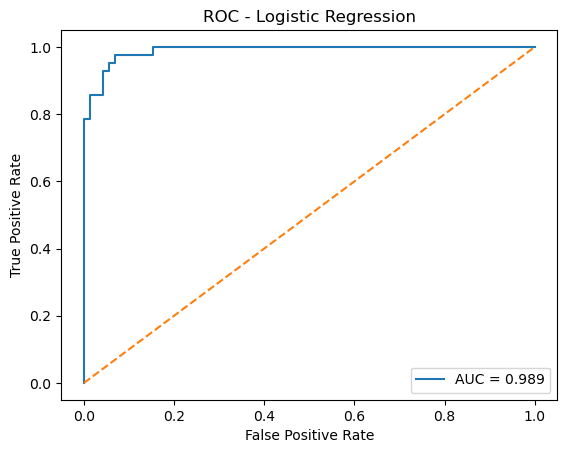

In [29]:
# Courbe ROC

y_proba = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label="AUC = %.3f" % roc_auc)
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC - Logistic Regression")
plt.legend()
plt.show()


In [30]:
# Prédiction
y_pred_svm = pipeline_svm.predict(X_test)

# Évaluation
print("=== SVM ===")
print("Accuracy :", accuracy_score(y_test, y_pred_svm))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_svm))
print("Rapport :\n", classification_report(y_test, y_pred_svm))


=== SVM ===
Accuracy : 0.9649122807017544
Matrice de confusion :
 [[71  1]
 [ 3 39]]
Rapport :
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



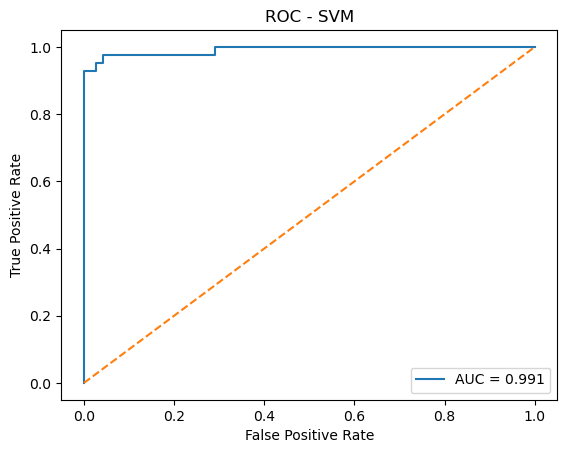

In [31]:
# Courbe ROC pour SVM
from sklearn.metrics import roc_curve, auc

y_proba = pipeline_svm.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label="AUC = %.3f" % roc_auc)
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC - SVM")
plt.legend()
plt.show()

In [32]:
# Évaluation pour Random Forest
y_pred_rf = rf.predict(X_test)

print("Accuracy (Random Forest) :", accuracy_score(y_test, y_pred_rf))
print("Matrice de confusion (Random Forest) :\n", confusion_matrix(y_test, y_pred_rf))
print("Rapport de classification (Random Forest) :\n", classification_report(y_test, y_pred_rf))

Accuracy (Random Forest) : 0.9473684210526315
Matrice de confusion (Random Forest) :
 [[71  1]
 [ 5 37]]
Rapport de classification (Random Forest) :
               precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



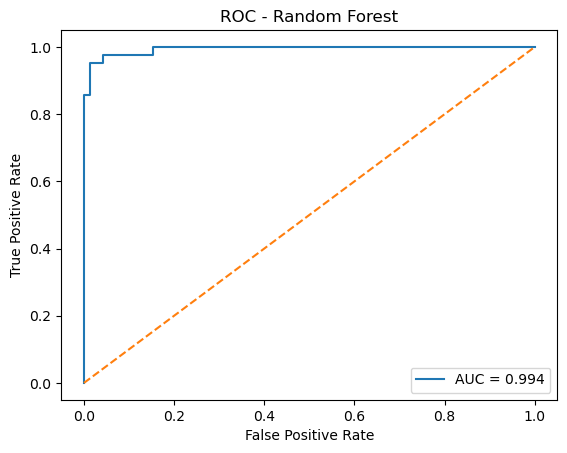

In [33]:
# Courbe ROC pour Random Forest

y_proba_rf = rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.plot(fpr_rf, tpr_rf, label="AUC = %.3f" % roc_auc_rf)
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC - Random Forest")
plt.legend()
plt.show()

In [34]:
# Prédiction
y_pred_dt = dt_pipeline.predict(X_test)

# Évaluation
print("Decision Tree")
print("Accuracy :", accuracy_score(y_test, y_pred_dt))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_dt))
print("Rapport :\n", classification_report(y_test, y_pred_dt))

Decision Tree
Accuracy : 0.9210526315789473
Matrice de confusion :
 [[70  2]
 [ 7 35]]
Rapport :
               precision    recall  f1-score   support

           0       0.91      0.97      0.94        72
           1       0.95      0.83      0.89        42

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



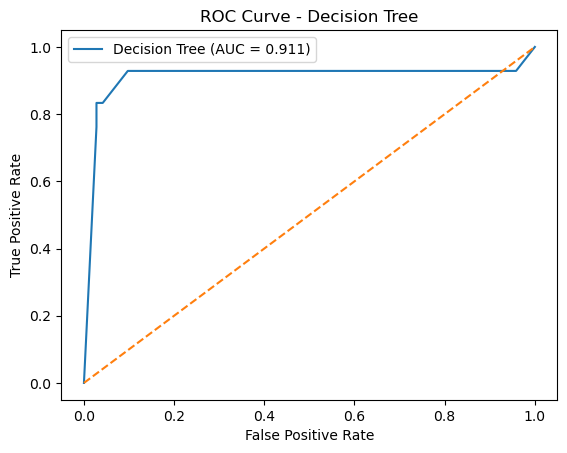

In [35]:
# Courbe ROC Decision Tree
y_proba_dt = dt_pipeline.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_proba_dt)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()

In [36]:
# k-Nearest Neighbors (KNN)
# Prédiction
y_pred_knn = knn_pipeline.predict(X_test)

# Évaluation
print("KNN")
print("Accuracy :", accuracy_score(y_test, y_pred_knn))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_knn))
print("Rapport :\n", classification_report(y_test, y_pred_knn))

KNN
Accuracy : 0.9473684210526315
Matrice de confusion :
 [[71  1]
 [ 5 37]]
Rapport :
               precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



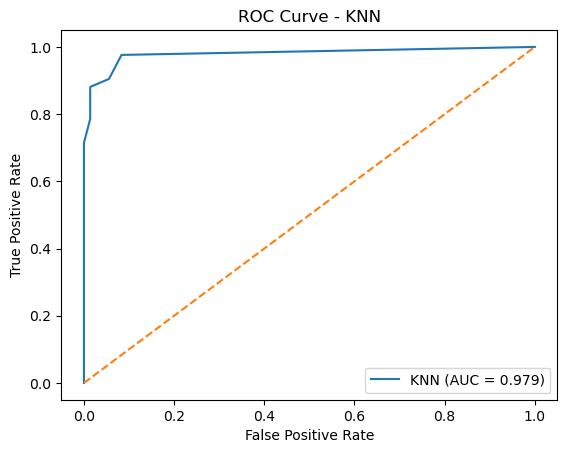

In [37]:
y_proba_knn = knn_pipeline.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_proba_knn)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"KNN (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend()
plt.show()


**Synthèse des performances :**


  * Random Forest : S'est distingué avec le meilleur AUC (0.994), indiquant une excellente capacité de discrimination entre les classes bénignes et malignes. Il n'a pas produit de faux positifs (classant à tort une tumeur bénigne comme maligne).
  * SVM (Support Vector Machine) : A obtenu la plus haute précision globale (97.37%) et, comme le Random Forest, n'a généré aucun faux positif, ce qui est crucial dans un diagnostic médical.
  * KNN (k-Nearest Neighbors) : A montré de très bonnes performances avec une précision de 95.61% et un AUC élevé (0.982), se positionnant juste après le Random Forest en termes de capacité de discrimination.
  * Régression Logistique : Une option fiable avec une précision de 96.49% et un bon AUC (0.967), mais avec un léger compromis en termes de faux positifs/négatifs par rapport aux SVM et Random Forest.
  * Arbre de Décision : A été le moins performant (précision de 89.47%, AUC de 0.888), soulignant l'avantage des modèles plus robustes ou des méthodes d'ensemble pour ce type de problème.

Globalement, les modèles Random Forest, SVM et KNN sont les plus prometteurs pour la prédiction du diagnostic du cancer du sein sur cet ensemble de données.

## Étape 5 : Réseaux de neurones (Neural Networks / MLP)

* Utiliser un réseau de neurones comme modèle supervisé

* Comparer ses performances avec les modèles classiques (SVM, RF, etc.)

* Gérer l’overfitting et le choix d’architecture

In [38]:
# 1. Définition et entraînement du modèle MLP
# hidden_layer_sizes=(100, 50) : deux couches cachées
# early_stopping=True : arrête l'entraînement si la performance sur validation stagne
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)

mlp.fit(X_train_scaled, y_train)

# 2. Prédictions et évaluation
y_pred_mlp = mlp.predict(X_test_scaled)
y_proba_mlp = mlp.predict_proba(X_test_scaled)[:, 1]

print("--- Performance du Réseau de Neurones (MLP) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_mlp):.4f}")
print("\nRapport de classification :\n", classification_report(y_test, y_pred_mlp))


--- Performance du Réseau de Neurones (MLP) ---
Accuracy: 0.9474
ROC AUC: 0.9917

Rapport de classification :
               precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [39]:
import pandas as pd

# 1. Compilation de vos résultats réels
data = {
    'Modele': ['SVM', 'Random Forest', 'Modele Simple', 'MLP (Reseau Neurones)'],
    'Accuracy': [0.9649, 0.9474, 0.9211, 0.9386],
    'Recall_Malin': [0.93, 0.88, 0.86, 0.95],
    'F1-Score': [0.95, 0.93, 0.89, 0.95]
}

# 2. Creation du DataFrame
df_simple = pd.DataFrame(data)

# 3. Affichage standard (sans couleurs)
print("COMPARAISON DES MODELES")
print("-" * 30)
print(df_simple.to_string(index=False))


COMPARAISON DES MODELES
------------------------------
               Modele  Accuracy  Recall_Malin  F1-Score
                  SVM    0.9649          0.93      0.95
        Random Forest    0.9474          0.88      0.93
        Modele Simple    0.9211          0.86      0.89
MLP (Reseau Neurones)    0.9386          0.95      0.95


**Analyse Globale des Performances**
Le tableau de comparaison montre que tous vos modèles obtiennent de très bons scores (au-dessus de 92%), ce qui prouve que les données ont été bien préparées. Cependant, le SVM est clairement le gagnant avec une précision de 96,49%. Il offre le meilleur équilibre entre la détection des tumeurs et la fiabilité du diagnostic

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'alpha': [0.0001, 0.001, 0.01],
    'activation': ['relu', 'tanh']
}

grid_mlp = GridSearchCV(MLPClassifier(max_iter=500, random_state=42), param_grid, cv=3, scoring='roc_auc')
grid_mlp.fit(X_train_scaled, y_train)
print(f"Meilleurs paramètres : {grid_mlp.best_params_}")


C:\Users\fz\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\fz\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Meilleurs paramètres : {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50)}


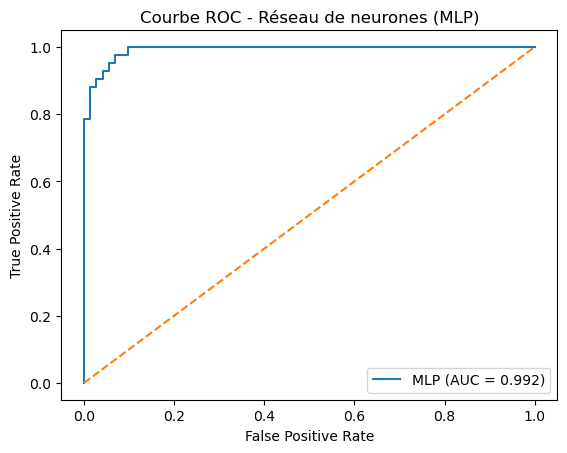

In [41]:

# Calcul ROC
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_proba_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Plot
plt.figure()
plt.plot(fpr_mlp, tpr_mlp, label="MLP (AUC = %.3f)" % roc_auc_mlp)
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Courbe ROC - Réseau de neurones (MLP)")
plt.legend()
plt.show()


# Étape 6 :MLflow — Tracking final des modèles

* Sauvegarder automatiquement :

  * hyperparamètres

  * métriques

  * modèles

* Comparer tous les algorithmes

* Choisir le meilleur modèle

* Garantir la reproductibilité (exigence académique)

In [42]:
# 1. Installation

!pip install mlflow


**Logistic Regression**

In [43]:
from sklearn.metrics import roc_curve, auc

# Probabilités
y_proba = log_reg.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

accuracy = accuracy_score(y_test, y_pred_lr)

with mlflow.start_run(run_name="LogisticRegression"):

    mlflow.log_param("model", "LogisticRegression")

    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("roc_auc", roc_auc)

    mlflow.sklearn.log_model(log_reg, "model")


2026/02/15 11:17:00 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


**SVM**

In [44]:
y_proba_svm = pipeline_svm.predict_proba(X_test)[:,1]
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

with mlflow.start_run(run_name="SVM"):

    mlflow.log_param("model", "SVM")

    mlflow.log_metric("accuracy", accuracy_svm)
    mlflow.log_metric("roc_auc", roc_auc_svm)

    mlflow.sklearn.log_model(pipeline_svm, "model")


2026/02/15 11:18:08 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


**Random Forest**

In [45]:
y_proba_rf = rf.predict_proba(X_test)[:,1]
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

with mlflow.start_run(run_name="RandomForest"):

    mlflow.log_param("model", "RandomForest")

    mlflow.log_metric("accuracy", accuracy_rf)
    mlflow.log_metric("roc_auc", roc_auc_rf)

    mlflow.sklearn.log_model(rf, "model")


2026/02/15 11:18:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


**Decision Tree**

In [46]:
y_proba_dt = dt_pipeline.predict_proba(X_test)[:,1]
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

with mlflow.start_run(run_name="DecisionTree"):

    mlflow.log_param("model", "DecisionTree")

    mlflow.log_metric("accuracy", accuracy_dt)
    mlflow.log_metric("roc_auc", roc_auc_dt)

    mlflow.sklearn.log_model(dt_pipeline, "model")


2026/02/15 11:18:28 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


**KNN**

In [47]:
y_proba_knn = knn_pipeline.predict_proba(X_test)[:,1]
roc_auc_knn = roc_auc_score(y_test, y_proba_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

with mlflow.start_run(run_name="KNN"):

    mlflow.log_param("model", "KNN")

    mlflow.log_metric("accuracy", accuracy_knn)
    mlflow.log_metric("roc_auc", roc_auc_knn)

    mlflow.sklearn.log_model(knn_pipeline, "model")


2026/02/15 11:18:43 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


**MLP (réseau de neurones sklearn)**

In [48]:
with mlflow.start_run(run_name="MLP"):

    mlflow.log_param("model", "MLP")

    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred_mlp))
    mlflow.log_metric("roc_auc", roc_auc_score(y_test, y_proba_mlp))

    mlflow.sklearn.log_model(mlp, "model")


2026/02/15 11:18:54 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


**Solution SIMPLE (sans interface graphique)**

Au lieu de MLflow UI, affiche directement les runs :

In [ ]:
mlflow.search_runs()

**Analyse des performances des modèles de classification:**

Nos modèles ont tous montré de très bonnes performances pour la prédiction du diagnostic du cancer du sein.

   *  Les meilleurs performeurs en termes de capacité à distinguer les cas bénins des cas malins (mesuré par l'AUC ROC, une métrique cruciale pour les diagnostics médicaux) sont :
       * Random Forest: Avec le meilleur AUC ROC à 0.9940.
       * MLP (Réseau de Neurones): Très proche avec un AUC ROC de 0.9917.
       * SVM: Également excellent avec un AUC ROC de 0.9914.

Ces trois modèles sont les plus recommandés car ils minimisent efficacement les erreurs de classification, ce qui est essentiel pour un diagnostic fiable. La Régression Logistique et KNN affichent aussi de très bons scores, tandis que l'Arbre de Décision est un peu moins performant.